# Reducción de dimensionalidad y primera aproximación al clustering de usuarios de teléfono móvil utilizando PCA

---



Partiendo de las múltiples acciones que realizan los usuarios de los teléfonos móviles como conjunto de datos, utilizaremos un **algoritmo no supervisado** de machine learning de **PCA** sobre el conjunto de datos de entrada inicial, que tiene un número muy alto de variables, con el objetivo de generar un nuevo conjunto de datos con la dimensionalidad de las variables reducida al máximo posible con la mayor cantidad de datos posibles y obtener una primera aproximación al número de clusters del conjunto de datos reducido. Aunque el dataset también tiene variable de salida, nos vamos a centrar solo en las variables de entrada en este ejercicio. 

### Importar las librerías necesarias y lectura del conjunto de datos

*   En primer lugar, se importan las librerias necesarias de **Python** para el tratamiento de los datos, generación de gráficas y generación del modelo.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

* En segundo lugar, se realiza la lectura de los ficheros en los que se encuentra el conjunto de datos, En este caso tendremos dos ficheros de entrenamiento y dos ficheros de prueba con extensión .txt y se copiará su contenido en variables de tipo array de numpy utilizando el método ***loadtxt()***.

In [0]:
x_train = np.loadtxt("samsung_train.txt")
x_test = np.loadtxt("samsung_test.txt")
y_train = np.loadtxt("samsung_train_labels.txt")
y_test = np.loadtxt("samsung_test_labels.txt")

* Después visualizamos el tamaño de los datasets. Observamos que los datsets contienen un número muy alto de variables de entrada, en total 561 variables.

In [3]:
print("Tamaño x_train:", x_train.shape)
print("Tamaño x_test :", x_test.shape)

Tamaño x_train: (7352, 561)
Tamaño x_test : (2947, 561)


### Visualización del dataset 

En este ejercicio el dataset de entrenamiento va a ser un array de 7352 observaciones con 561 variables. 

In [4]:
x_train

array([[ 0.28858451, -0.02029417, -0.13290514, ..., -0.84124676,
         0.17994061, -0.05862692],
       [ 0.27841883, -0.01641057, -0.12352019, ..., -0.8447876 ,
         0.18028889, -0.05431672],
       [ 0.27965306, -0.01946716, -0.11346169, ..., -0.84893347,
         0.18063731, -0.04911782],
       ...,
       [ 0.27338737, -0.01701062, -0.04502183, ..., -0.77913261,
         0.24914484,  0.04081119],
       [ 0.28965416, -0.01884304, -0.15828059, ..., -0.78518142,
         0.24643223,  0.02533948],
       [ 0.35150347, -0.01242312, -0.20386717, ..., -0.78326693,
         0.24680852,  0.03669484]])

En este ejercicio el dataset de prueba va a ser un array de 2947 observaciones con 561 variables. 

In [5]:
x_test

array([[ 0.25717778, -0.02328523, -0.01465376, ..., -0.72000927,
         0.27680104, -0.0579783 ],
       [ 0.28602671, -0.01316336, -0.11908252, ..., -0.69809082,
         0.28134292, -0.08389801],
       [ 0.27548482, -0.02605042, -0.11815167, ..., -0.70277146,
         0.28008303, -0.0793462 ],
       ...,
       [ 0.34996609,  0.03007744, -0.11578796, ..., -0.65535684,
         0.27447878,  0.18118355],
       [ 0.23759383,  0.01846687, -0.09649893, ..., -0.65971859,
         0.26478161,  0.18756291],
       [ 0.15362719, -0.01843651, -0.13701846, ..., -0.66008023,
         0.26393619,  0.1881034 ]])

### Unión de los conjuntos de datos de entrenamiento y test

Es frecuente dividir el dataset en dos, una para el entrenamiento del modelo y otra para probar el modelo. En este caso tenemos los datasets de entrenamiento y prueba separados y lo que debemos hacer en este caso es unirlos.

El este ejercicio para obtener nuestra variable x, vamos a unir los datos de entrenamiento y los de prueba utilizando el método ***vstack()*** de **numpy**.

El este ejercicio para obtener nuestra variable y, vamos a unir los datos de entrenamiento y los de prueba utilizando el método ***hstack()*** de **numpy**.

In [6]:
x = np.vstack([x_train, x_test])
y = np.hstack([y_train, y_test])
print("Tamaño x:", x.shape)

Tamaño x: (10299, 561)


### Escalar el conjunto datos de entrada

Antes de aplicar PCA es recomendable escalar los datos, para ello utilizaremos el método ***StandardScaler()*** de la librería **Sklearn** para generar una instancia y el método de la instancia ***fit_transform()*** 

In [7]:
modeloSS = StandardScaler()
x_scaled = modeloSS.fit_transform(x)
x_scaled

array([[ 2.10533854e-01, -6.87026385e-02, -4.52194533e-01, ...,
        -6.74432366e-01,  3.82007658e-01, -1.61505480e-02],
       [ 6.02084832e-02,  3.59023537e-02, -2.75221885e-01, ...,
        -6.81359801e-01,  3.83147865e-01, -1.20627169e-04],
       [ 7.84597052e-02, -4.64269585e-02, -8.55480582e-02, ...,
        -6.89470939e-01,  3.84288531e-01,  1.92144041e-02],
       ...,
       [ 1.11821625e+00,  1.28805864e+00, -1.29414692e-01, ...,
        -3.10750224e-01,  6.91509049e-01,  8.75719123e-01],
       [-5.43492722e-01,  9.75327452e-01,  2.34319837e-01, ...,
        -3.19283719e-01,  6.59762215e-01,  8.99444350e-01],
       [-1.78515253e+00, -1.86663622e-02, -5.29759691e-01, ...,
        -3.19991245e-01,  6.56994458e-01,  9.01454465e-01]])

### Generación del modelo

Inicializamos el modelo llamando a una instancia de ***PCA()*** de la librería ***sklearn***. Configuramos el algoritmo para obtener un 90% de los datos originales.

Llamando al método **fit()** en la instancia del modelo y pasando por parámetro al método el dataset escalado, el algoritmo entrena y genera nuestro modelo.

Por último llamando al método **transform()** en la instancia del modelo y pasando por parámetro al método el dataset escalado, el algoritmo genera un dataset con la dimensionalidad reducida.


In [8]:
modeloPCA = PCA(n_components=0.9)
modeloPCA.fit(x_scaled)
x_pca = modeloPCA.transform(x_scaled)
x_pca

array([[-16.38097982,   1.99508307,   3.41569023, ...,   0.34256962,
         -0.24397444,  -1.94678658],
       [-15.58217328,   1.18259368,  -0.32120675, ...,   0.13742091,
         -0.16081322,  -0.61432028],
       [-15.42398918,   2.24316643,  -1.23778356, ...,  -1.47098019,
         -1.24311139,   0.24672176],
       ...,
       [ 11.84685312,  -3.43356502,   2.18801926, ...,  -0.94467044,
         -0.34497972,  -2.09465647],
       [  8.20668637,  -4.38648876,   1.31871955, ...,   0.11723446,
         -1.32786056,   0.08742446],
       [  9.31117251,  -3.98616133,   1.93301747, ...,   0.12988206,
         -1.86396408,  -0.18253505]])

### Reduccción de dimensionalidad

El objetivo de PCA es reducir la dimensionalidad del dataset inicial, eso implica perder un porcentaje del dataset inicial, en nuestro caso ha sido un 10%, sin embargo habremos optimizado nuestro dataset con el menor número de variables posibles que contenga la mayor varianza posible para generar un modelo, en este caso el 90% de la varianza inicial.

Averiguando el tamaño de nuestro dataset reducido en variables, observamos que hemos pasado de 561 variables a 65 variables. Lo que significa que en estas 65 variables tenemos el 90% de la información del dataset inicial.

In [9]:
print("Tamaño x_pca:", x_pca.shape)

Tamaño x_pca: (10299, 65)


### Porcentaje de varianza en los componentes

La cantidad de información o varianza del dataset inicial, en nuestro nuevo dataset es el 90%. Ese porcentaje se encuentra repartido en las nuevas variables o componentes resultantes al reducir la dimensionalidad. 

Utilizando el atributo ***explained_variance_ratio_*** de la instancia del modelo PCA podemos visualizar el porcentaje de varianza que hay en cada variable del dataset reducido en variables.

In [10]:
var_total = 0
for i in range(x_pca.shape[1]):
  print("Varianza variable",i+1,": ",modeloPCA.explained_variance_ratio_[i])
  var_total += modeloPCA.explained_variance_ratio_[i]
print("Total varianza:", var_total)

Varianza variable 1 :  0.5073822103501332
Varianza variable 2 :  0.06239185775196527
Varianza variable 3 :  0.02692563862707257
Varianza variable 4 :  0.024528709674849044
Varianza variable 5 :  0.018889356574165777
Varianza variable 6 :  0.016313954036245658
Varianza variable 7 :  0.014145332364692722
Varianza variable 8 :  0.012162106150970194
Varianza variable 9 :  0.009852475637666922
Varianza variable 10 :  0.009492281932067019
Varianza variable 11 :  0.00858303631237002
Varianza variable 12 :  0.00809979908493794
Varianza variable 13 :  0.007658626696475733
Varianza variable 14 :  0.006766676168486711
Varianza variable 15 :  0.006302416178069038
Varianza variable 16 :  0.006157177330209034
Varianza variable 17 :  0.00595334955327231
Varianza variable 18 :  0.005771954942009553
Varianza variable 19 :  0.005634312873961766
Varianza variable 20 :  0.005408298539982392
Varianza variable 21 :  0.005188278704203166
Varianza variable 22 :  0.00502741665785709
Varianza variable 23 :  0.0

### Primera aproximación a los clusters

Podemos distinguir en una gráfica que en principio hay 2 clusters bien definidos. La gráfica muestra las 2 variables con mayor número de varianza del conjunto de datos reducido.

* El primer cluster se aprecia en colores amarillo y verde claro.
* El segundo cluster se aprecia en colores azul y violeta.

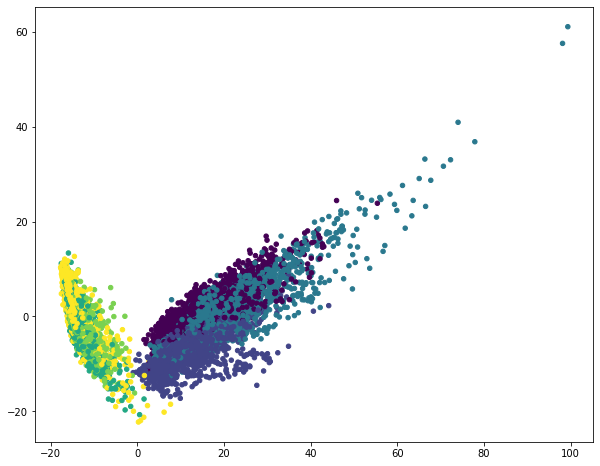

In [11]:
plt.figure(figsize=(10, 8))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, s=20, cmap='viridis');